# Housing Loan Prediction :


1.   This self project is part of a hackathon on analyticsvidhya. 
2.   Link for dataset:https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/



Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

Importing dataset:

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train_ctrUa4K.csv to train_ctrUa4K.csv


In [ ]:
import io
  
df = pd.read_csv(io.BytesIO(uploaded['train_ctrUa4K.csv']))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.shape

(614, 13)

Checking the number of unique values in dataset:

In [ ]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Check for null values:

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Cleaning the data:**

Filling up categorial the missing values :
 

1.   we're filling with mode i.e. with the most frequent value.






In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Understanding the rest features before filling it :

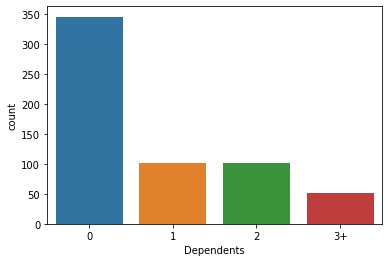

In [ ]:
sns.countplot(x= 'Dependents', data=df)

So, seeing the data most advisable is to fill it with mode again,

In [ ]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

Checking for outliers for next few features before filling in NaN values:

In [ ]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

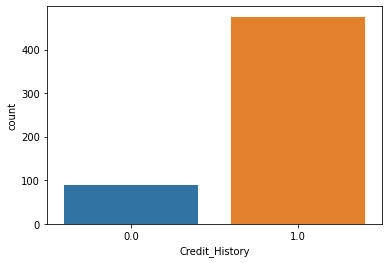

In [ ]:
sns.countplot(x ='Credit_History', data=df)

Seems , mode i.e. the most frequent one will be appropriate value to fill the missing values. 

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

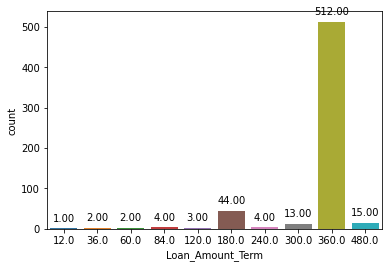

In [ ]:
splot = sns.countplot(x ='Loan_Amount_Term', data = df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

We can see that 360 of them has the common term period , so again mode :)

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

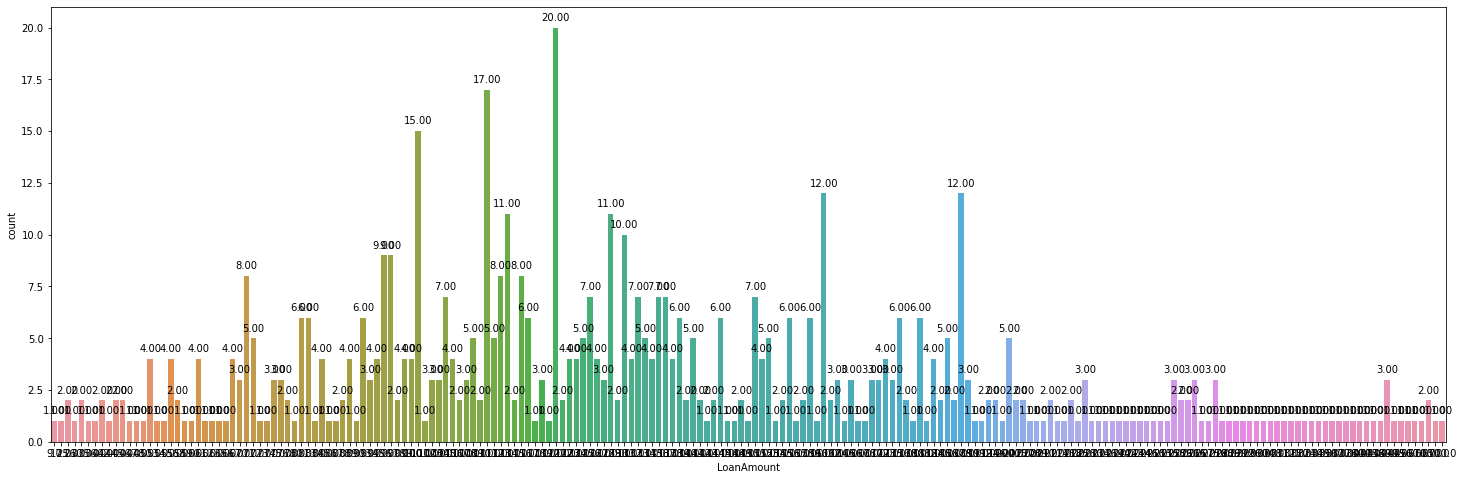

In [ ]:


plt.figure(figsize=(25, 8))
splot = sns.countplot(x ='LoanAmount', data = df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')







1.   we can not replace loan amount with mode because here mean or median will  be better.
2.   before making choice beteween mean and median we have to check for outliers.
3. becuase mean is affected by outliers.



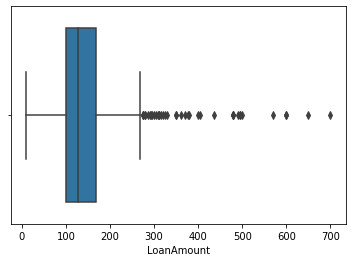

In [ ]:
sns.boxplot(x='LoanAmount', data=df)

As we see there are outliers here :

1.   we find outliers by IQR
2.   we select either median or mean ti fill NaN values



In [ ]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3-Q1


In [ ]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)


-2.0
270.0


In [ ]:
outlier=[]
for x in df['LoanAmount']:
    if((x>up_lim) or(x<low_lim)):
       outlier.append(x)

print(outlier)

[349.0, 315.0, 320.0, 286.0, 312.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [ ]:
len(outlier)

39



1.   we will not remove the outliers becuase it has 39/592, which means it has 6.5% amount of data in whole.
2.  we will use median to replace the missing value.
becuase median is not affected by the outliers.





In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So, now there're no missing values .

In [ ]:
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


**Relationship Analysis :**

Now  we'll try to see which features should be removed :

Categorial data's are analyzed first:

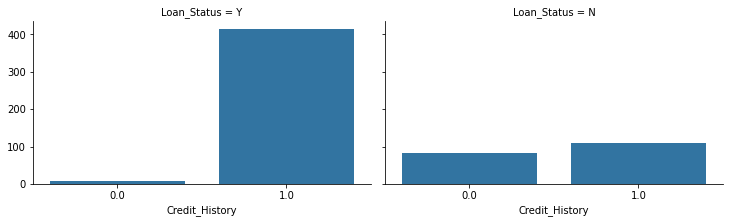

In [ ]:

grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

Here , we can see that person having above par credit score have more chances of getting a loan.

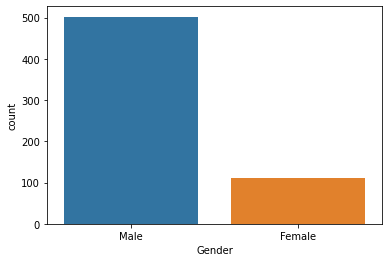

In [ ]:
sns.countplot(x='Gender', data=df)

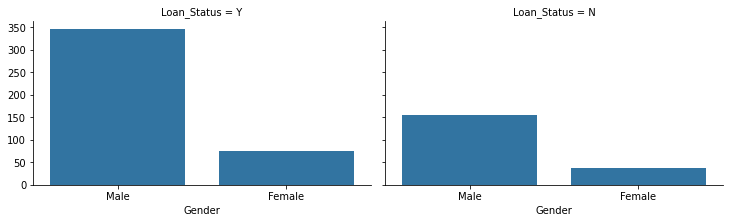

In [ ]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

Females have better chances of getting their loan approved.

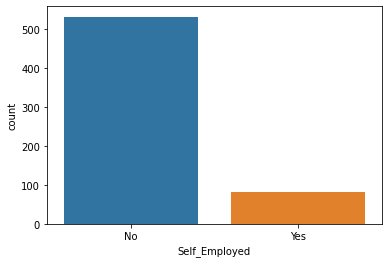

In [ ]:
sns.countplot(x='Self_Employed', data=df)

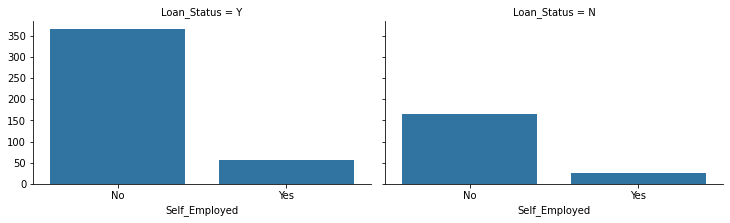

In [ ]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot , 'Self_Employed')

Here the ratio of approval does not differs that much , we can remove this feature , but for now we'll take this into consideration for our model. 

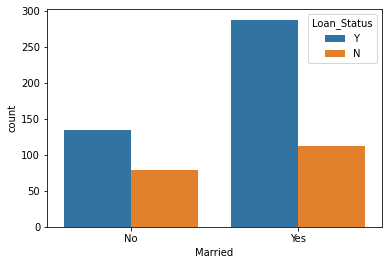

In [ ]:
sns.countplot(x='Married', hue = 'Loan_Status' , data=df)

Here, we can observe that married status has higher chances of getting a loan .

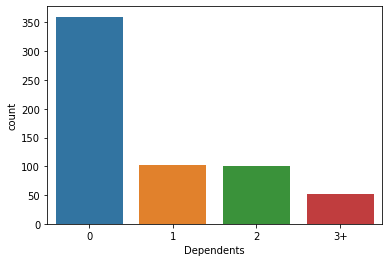

In [ ]:
sns.countplot(x='Dependents', data=df)

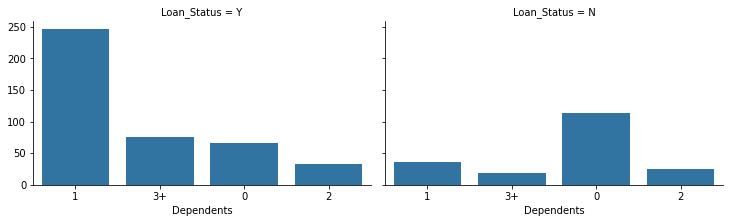

In [ ]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Dependents')

Here the ratio of approval does not depends that much of dependents , so we'll remove this from our data set. 

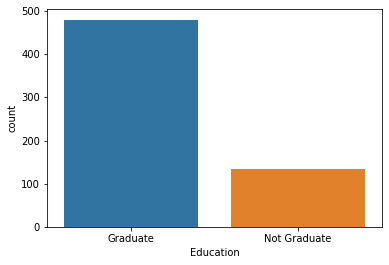

In [ ]:
sns.countplot(x='Education' ,data=df)

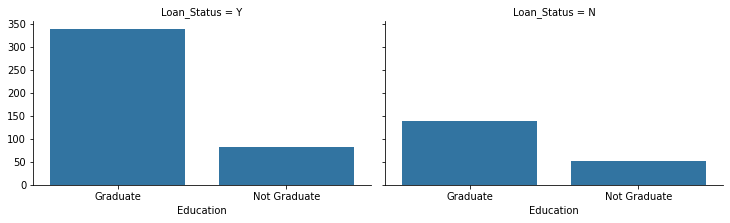

In [ ]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')

Graduate Applicants have their ratio of acceptance much better .

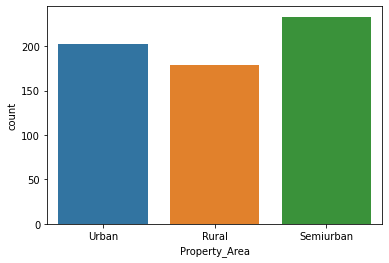

In [ ]:
sns.countplot(x='Property_Area', data=df)

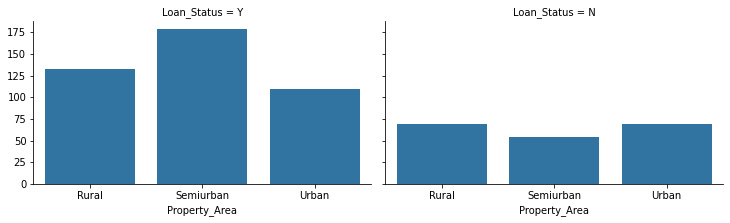

In [ ]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Property_Area')

Rural and Semi-urban property proposals have much better chances of approval than urban ones.

Now we move onto Numerical Data:

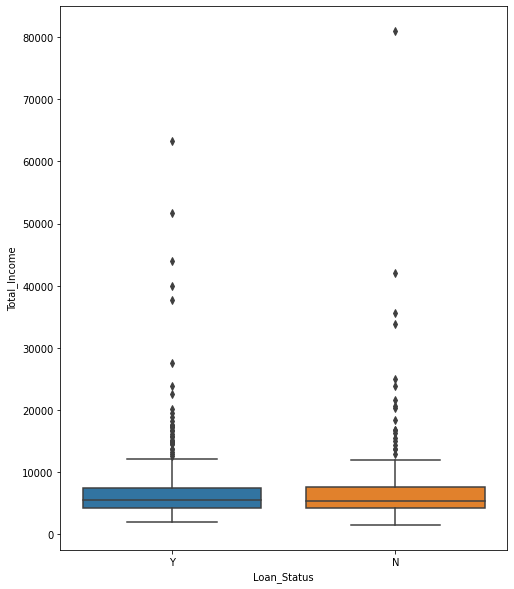

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Loan_Status', y='Total_Income', data=df)

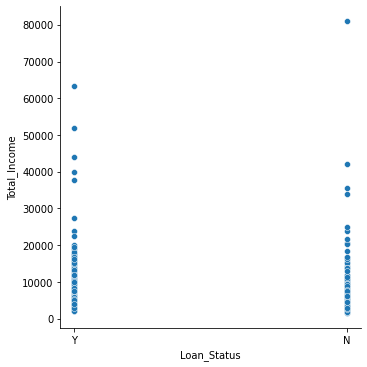

In [ ]:
sns.relplot(x='Loan_Status', y='Total_Income', data=df)

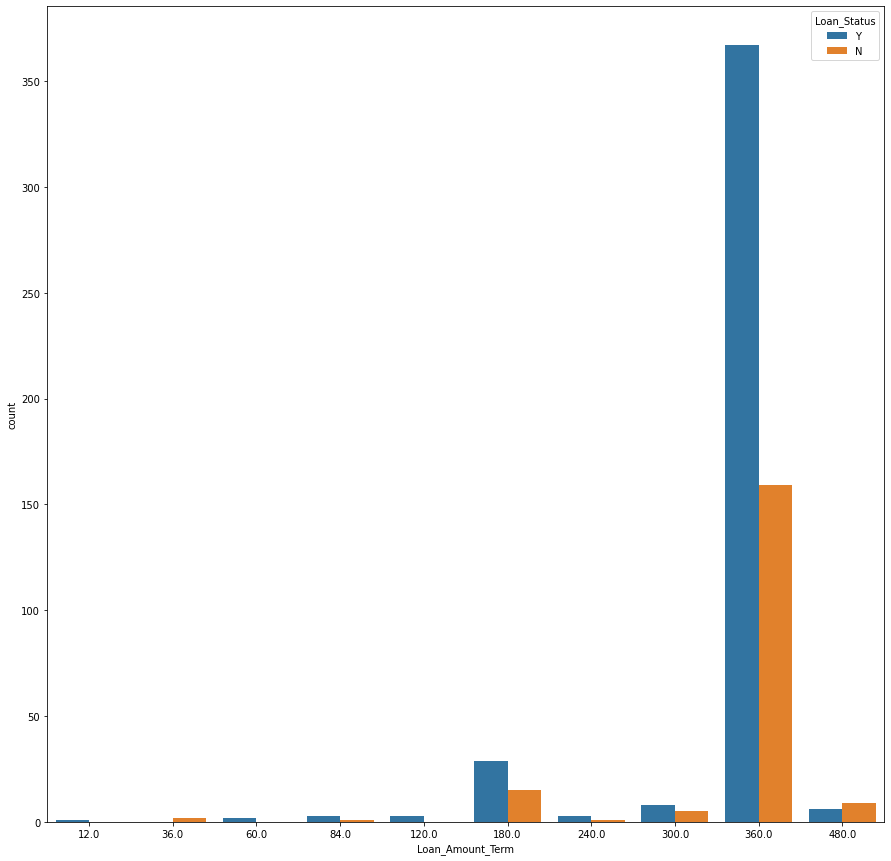

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)

So, we can see that Loan Term does not effects chances of loan acceptance.

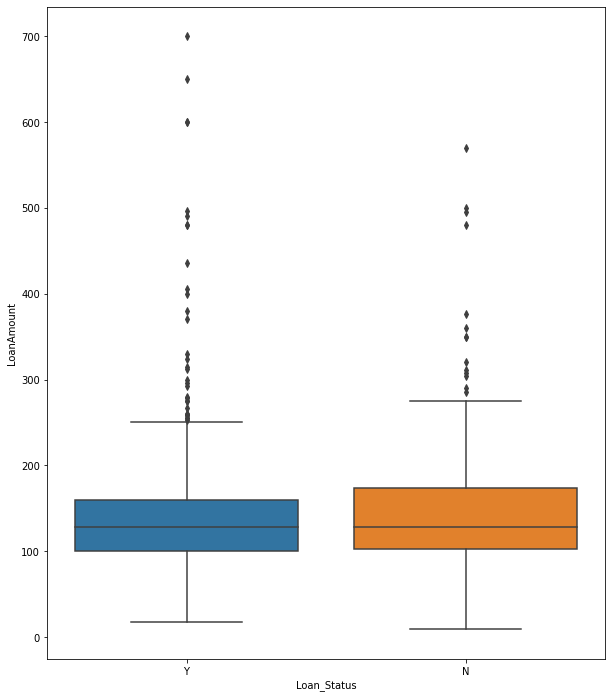

In [ ]:
plt.figure(figsize=(10,12))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)

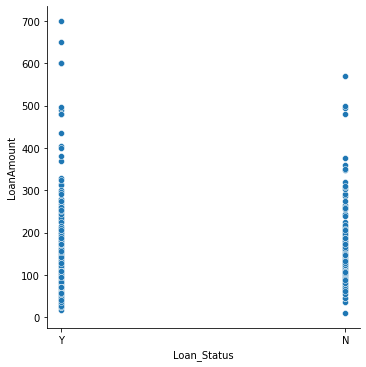

In [ ]:
sns.relplot(x='Loan_Status', y='LoanAmount', data=df)

Too many outliers again can lead to overfitting of our model .

Now we'll remove the redundant features:

In [ ]:
col = ['Loan_ID', 'Dependents','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'] 
df = df.drop(columns = col, axis = 1)
df.head()

,Gender,Married,Education,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,Graduate,128.0,1.0,Urban,Y,5849.0
1,Male,Yes,Graduate,128.0,1.0,Rural,N,6091.0
2,Male,Yes,Graduate,66.0,1.0,Urban,Y,3000.0
3,Male,Yes,Not Graduate,120.0,1.0,Urban,Y,4941.0
4,Male,No,Graduate,141.0,1.0,Urban,Y,6000.0


Now we move onto building our model and prepairing the data to be trained.

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married', 'Education','Loan_Status', 'Property_Area']
le = LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,Gender,Married,Education,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,128.0,1.0,2,1,5849.0
1,1,1,0,128.0,1.0,0,0,6091.0
2,1,1,0,66.0,1.0,2,1,3000.0
3,1,1,1,120.0,1.0,2,1,4941.0
4,1,0,0,141.0,1.0,2,1,6000.0


In [ ]:
X = df.drop(columns=['Loan_Status'], axis=1)
Y = df['Loan_Status']

Now we'll make preprocess the test set for submission in hackathon:

In [ ]:
uploaded=files.upload()

Saving test_lAUu6dG.csv to test_lAUu6dG.csv


In [ ]:
import io
  
test_df = pd.read_csv(io.BytesIO(uploaded['test_lAUu6dG.csv']))
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Expecting similar behaviour of data as in train set , we'll replace missing values similar to train set. 

In [ ]:
test_df['Gender'] = test_df['Gender'].fillna(test_df['Gender'].mode()[0])
test_df['Self_Employed'] = test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0])
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])
test_df['Dependents'] = test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0])

In [ ]:
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())

In [ ]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
test_df['Total_Income'] = test_df['ApplicantIncome']+test_df['CoapplicantIncome']
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276


In [ ]:
X_pred=test_df
cols = ['Loan_ID', 'Dependents','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
X_pred=X_pred.drop(columns = cols, axis=1)
X_pred.head()

,Gender,Married,Education,LoanAmount,Credit_History,Property_Area,Total_Income
0,Male,Yes,Graduate,110.0,1.0,Urban,5720
1,Male,Yes,Graduate,126.0,1.0,Urban,4576
2,Male,Yes,Graduate,208.0,1.0,Urban,6800
3,Male,Yes,Graduate,100.0,1.0,Urban,4886
4,Male,No,Not Graduate,78.0,1.0,Urban,3276


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married', 'Education', 'Property_Area']
le = LabelEncoder()
for col in cols:
    X_pred[col]=le.fit_transform(X_pred[col])
X_pred.head()

,Gender,Married,Education,LoanAmount,Credit_History,Property_Area,Total_Income
0,1,1,0,110.0,1.0,2,5720
1,1,1,0,126.0,1.0,2,4576
2,1,1,0,208.0,1.0,2,6800
3,1,1,0,100.0,1.0,2,4886
4,1,0,1,78.0,1.0,2,3276


Now our testing dataset is ready to be predicted after training our model.

# Model Training and predicting :

Forming a standard function which will be used to run several models on dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
model = xgb.XGBClassifier(objective ='reg:logistic',max_depth = 5,alpha = 10,reg_lambda=0.05,n_estimators = 35)
model.fit(X_train, Y_train)
print("Accuracy is", model.score(X_test, Y_test)*100)
score = cross_val_score(model, X, Y, cv=5)
print("Cross validation is", np.mean(score)*100)
Y_pred=model.predict(X_pred)
print(Y_pred)
   


Accuracy is 76.42276422764228
Cross validation is 79.80940956950555
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1]


In [ ]:
pred = []
for i in range(0, len(Y_pred)):
   if Y_pred[i]==1:
       pred.append('Y')
   else:
       pred.append('N')
pred

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N'

In [ ]:
len(pred)

367

writing the predicted values into file for submission:

In [ ]:
import csv 
with open('test_predictions.csv', 'w', newline = '') as csvfile:
  fieldnames = ['Loan_ID','Loan_Status']
  thewriter = csv.DictWriter(csvfile, fieldnames = fieldnames)
  thewriter.writeheader()
  for i in range (0, len(Y_pred)):
      thewriter.writerow({'Loan_ID':test_df['Loan_ID'][i], 'Loan_Status':pred[i]})
    